Employee Turnover Analysis
 


In [218]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('Human_Resources.csv')
>>> print(df)
#This dataframe shows us a list of employees from a specific company and variables describing their time there.
#We want to look at the rate of turnover of the employees and answer a few questions to help the company moving foward.
#First we want to identify which factor is most predictive of an employee leaving?
#Next,can the company allocate more money to their employees to help entice them to stay? 
#Lastly, what can the company do preemptively while hiring an employee to help prevent said employee from leaving? 
#By looking at the data we can come to some conclusions that should help the company dealing with their turnover problem

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [20]:
list(df)
#Listing the list of variables which are represented in the dataset. 

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [24]:
df['left'].mean()

0.2380825388359224

In [131]:
#The column 'left' has an integer value to represent whether or not the employee left the company with 1 indicatiNG they did
#and 0 indicating they did not. Taking the mean of this data we can see 23% of employees did indeed leave the company.

left_summary= df.groupby('left')
left_summary.mean()

#Here we are summarzing the data based on the average of each variable when an employee left and when an employee stayed.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [155]:


corrframe = pd.DataFrame(df.corr())
corrframe
#We have created a new dataframe showing a matrix of the correlation between all of the variables. The column we want to focus on
#at the moment is the "left" row. Here we can see which values are most closely correlated, positive or negative, to an employee 
#leaving.
#The Heat Map will give us a visual representation of which values are closest correlated.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


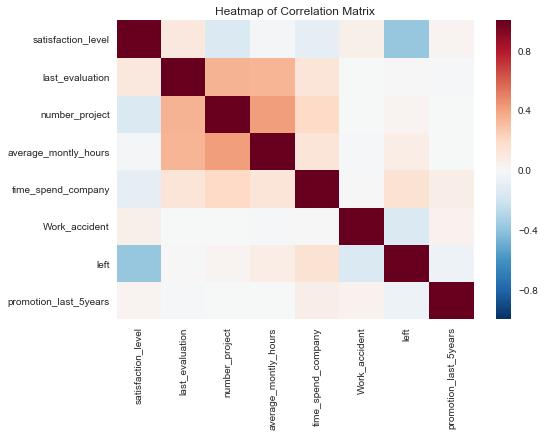

In [160]:
import seaborn as sns
sns.heatmap(corrframe)
sns.plt.title('Heatmap of Correlation Matrix')


In [151]:
print (corrframe['left'])
#We want to look at the absolute value of each these values so we can see which variable has the most impact on an employee leaving
#whether that value is positive or negative. So we are looking for the values closest to 1 or -1.
#"Satisfaction level" has the largest correlation positive or negative to employees leaving the firm.

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64


In [ ]:
#To take a closer look at the "satisfaction level" variable we want to first find out whether the variable is normally distributed.

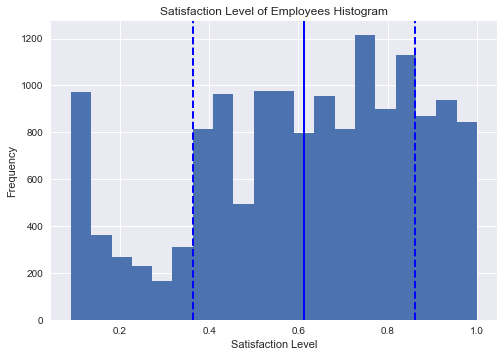

In [164]:
satis = df['satisfaction_level']
plt.hist(satis, bins=20)
plt.axvline(satis.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(satis.mean() + satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(satis.mean()-satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.title('Satisfaction Level of Employees Histogram')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')


In [166]:
satis_1 = sorted(satis)
norm = np.random.normal(0, 1, 14999)
norm_1 = sorted(norm)

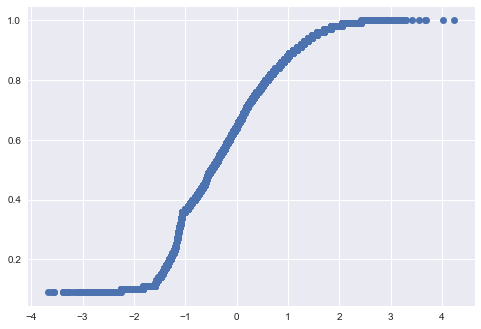

In [167]:
plt.plot(norm_1, satis_1, "o") 
plt.show() 

In [168]:
import scipy.stats as stats
stats.normaltest(satis)
#Taking a look at the two graphs and the p value of our Normal test we can see that the data is not normally distributed.
#Despite the non normal distribution if we separate the means of both employees who left and those who didn't
#we can take a t-test to try and determine significance due to the high sample size.

NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261)

In [206]:
#From our earlier chart we can see the mean satisfaction level of employees who left was 0.440098.
#The mean satisfaction level of employees who stayed was 0.666810.
satis_left = df[df['left']==1]['satisfaction_level']
satis_stay = df[df['left']==0]['satisfaction_level']
#print(satis_left)
#print (satis_stay)

from scipy.stats import ttest_ind, ttest_ind_from_stats
ttest_ind(satis_left, satis, equal_var=False)
#Our t test stat is -35.5 with a very small p value. This tells us that satisfaction level of employees who left is indeed
#statistically lower than the satisfcation level of all the employees as a whole.

Ttest_indResult(statistic=-35.535364033870856, pvalue=1.0050711462549061e-247)

In [59]:
#Next we want to look at the salaries of the employees and see if more money can be spent on payroll to entice workers to stay.
salary = df['salary']
x = set(salary)
print (x)

{'high', 'medium', 'low'}


In [225]:
from collections import Counter
Counter(salary)
#There are 1237 instances of a high salary, 7316 instances of a low salary, and 6446 instances of a medium salary.


Counter({'high': 1237, 'low': 7316, 'medium': 6446})

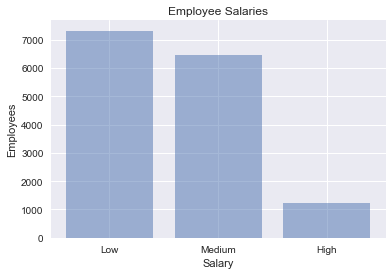

In [236]:
new_sal = [7316, 6446, 1237]
objects = ('Low', 'Medium','High')
y_pos = np.arange(len(objects))
plt.bar(y_pos, new_sal, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Employees')
plt.xlabel('Salary')
plt.title('Employee Salaries')
 
#We Have a bar chart showing the number from the table above. To get meaningful information from this chart we need to add the
#amount of employees who left the company from each salary point.

In [299]:
sal_low = df[(df['left']==1) & (df['salary']=='low')]
sal_low.count()

satisfaction_level       2172
last_evaluation          2172
number_project           2172
average_montly_hours     2172
time_spend_company       2172
Work_accident            2172
left                     2172
promotion_last_5years    2172
sales                    2172
salary                   2172
dtype: int64

In [298]:
sal_med = df[(df['left']==1) & (df['salary']=='medium')]
sal_med.count()

satisfaction_level       1317
last_evaluation          1317
number_project           1317
average_montly_hours     1317
time_spend_company       1317
Work_accident            1317
left                     1317
promotion_last_5years    1317
sales                    1317
salary                   1317
dtype: int64

In [293]:
sal_high =df[(df['left']==1) & (df['salary']=='high')]
sal_high.count()

satisfaction_level       82
last_evaluation          82
number_project           82
average_montly_hours     82
time_spend_company       82
Work_accident            82
left                     82
promotion_last_5years    82
sales                    82
salary                   82
dtype: int64

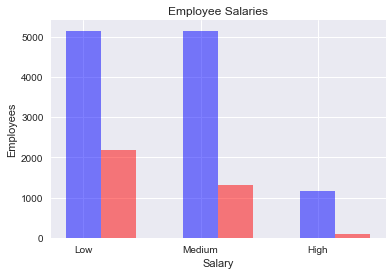

In [319]:
#Now we can see how many employees left the company from each salary point.
sal_left =[2172,1317,82]
sal_stayed =[(7316-2172),(6446-1317),(1237-82)]
objects = ('Low', 'Medium','High')
y_pos =np.arange(len(objects))
plt.bar(y_pos, sal_stayed, align='center', alpha=0.5, width=.3, color='b', label= 'Stayed With Company')
plt.bar(y_pos+.3, sal_left, align='center', alpha=0.5, width=.3, color ='r', label='Left Company')
plt.xticks(y_pos, objects)
plt.ylabel('Employees')
plt.xlabel('Salary')
plt.title('Employee Salaries')
plt.legend(loc='upper right')

#Add legend

In [ ]:
#The company should look to increase salary if they want to retain employees. Employees with high salaries rarely leave 
#the company while employees with medium and low salaries leave at a much more frequent rate.